## Nearest neighbor classifier
Implement a function that realizes an n-nearest neighbor classifier, i.e. a
function that decides the class label of a test data point from the majority
of the labels among the n nearest training data.
Download the files data2-train.dat and data2-test.dat of labeled
2D data and determine the recognition accuracy (percentage of correctly
classified data points) of your classifier for n ∈ {1, 3, 5}.
Determine the overall run time for computing the 1-nearest neighbor of
every data in data2-test.dat.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt, rcParams as params
import seaborn as sns

from time import time,clock
from heapq import nsmallest
import matplotlib.patches as mpatches



%matplotlib inline

params['figure.figsize'] = (10.0, 7.0)


In [2]:
train_data = pd.read_csv("data2-train.dat",delimiter=' ',header=None)
test_data = pd.read_csv("data2-test.dat",delimiter=' ',header=None)

In [3]:
column_names={0:"Attr 1",1:"Attr 2",2:"Class"}
train_data.rename(columns=column_names,inplace=True)
test_data.rename(columns=column_names,inplace=True)

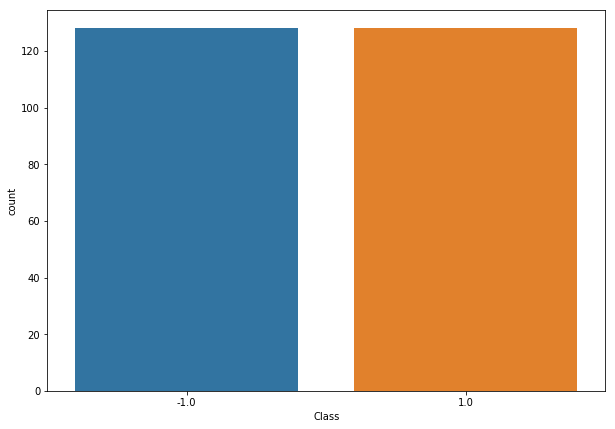

In [4]:
sns.countplot(train_data['Class'])

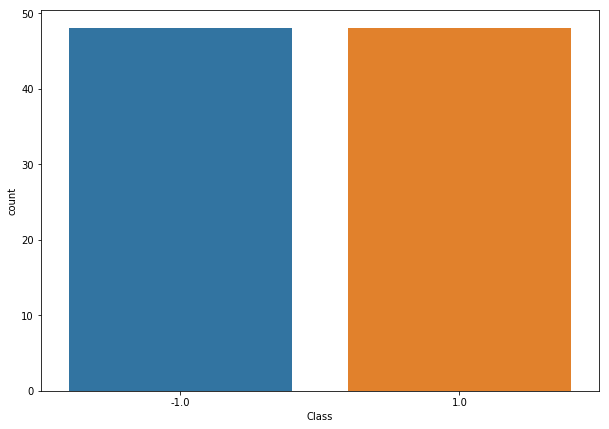

In [5]:
sns.countplot(test_data['Class'])

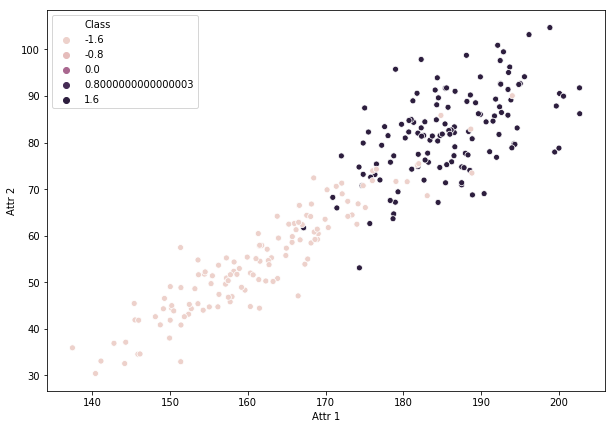

In [6]:
sns.scatterplot(x="Attr 1",y="Attr 2",hue="Class",data=train_data)

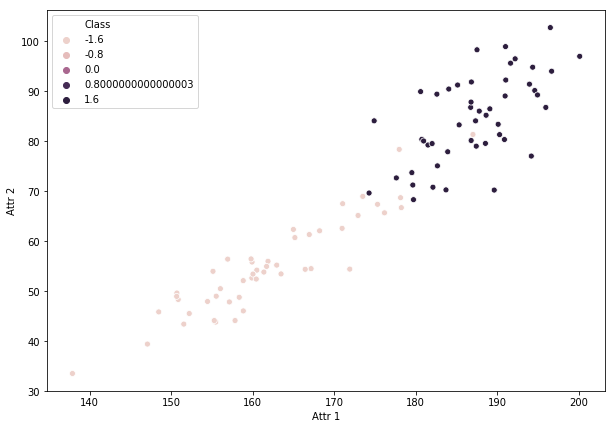

In [7]:
sns.scatterplot(x="Attr 1",y="Attr 2",hue="Class",data=test_data)

In [8]:
def knn(X_train,y,X_test,neighbours=1,plot=True,print_time=True):
    labels = np.empty(X_test.shape[0])
    
    #     code for plotting the decision boundary
    if plot:
        
        # plotting color mesh
        h = 1
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = knn(X_train,y_train,np.c_[xx.ravel(), yy.ravel()],neighbours,False,False)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab10)
        
        # Plot training points
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=plt.cm.tab10, edgecolor = 'black')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title("Binary classification (k = %i)"
                   % (neighbours))    
        plt.show()
    
    #     starting the timer
    start = clock()
    for i,data_point in enumerate(X_test):
        diff = X_train- data_point
        sqr = np.square(diff)
        sqr_sum = np.sum(sqr,axis=1)
        nearest_neighbours_idx = np.argpartition(sqr_sum, neighbours)[:neighbours]
        labels[i] = y[nearest_neighbours_idx].mode()[0]
    
    #     stopping the timer
    stop = clock()

    if print_time:
        print("Time taken for %d labels: %.4f seconds" % (X_test.shape[0],stop-start) )
    return labels

In [9]:
def accuracy(y_pred,y_actual):
    correct_lables = y_pred == y_actual
    return 100*correct_lables.sum()/correct_lables.shape[0]


In [10]:
X_train = train_data.drop(columns=["Class"]).as_matrix()
y_train = train_data["Class"]
                          
X_test = test_data.drop(columns=["Class"]).as_matrix()
y_test = test_data["Class"]


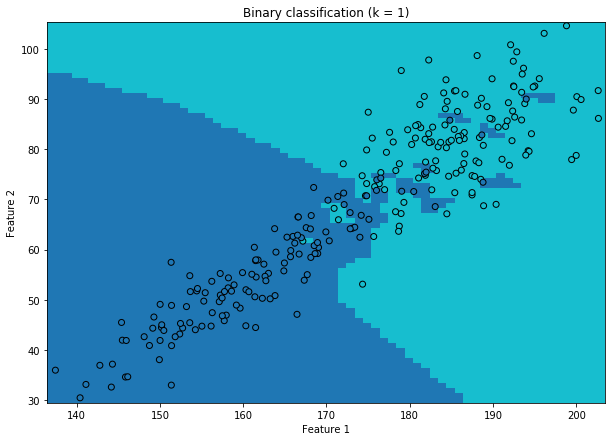

Time taken for 256 labels: 0.2639 seconds
Traing Accuracy 	 for k = 1 is 100.00%
Time taken for 96 labels: 0.0921 seconds
Testing Accuracy	 for k = 1 is 88.54%
------------------------------------------------


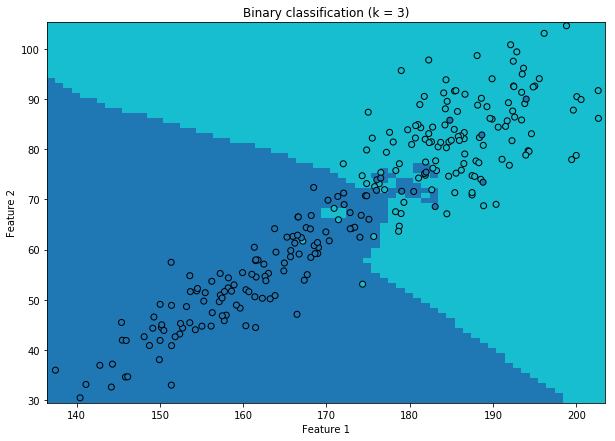

Time taken for 256 labels: 0.3065 seconds
Traing Accuracy 	 for k = 3 is 94.53%
Time taken for 96 labels: 0.1082 seconds
Testing Accuracy	 for k = 3 is 89.58%
------------------------------------------------


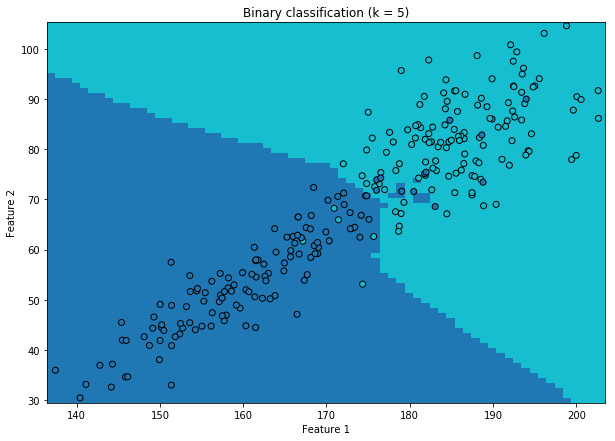

Time taken for 256 labels: 0.2409 seconds
Traing Accuracy 	 for k = 5 is 93.36%
Time taken for 96 labels: 0.0781 seconds
Testing Accuracy	 for k = 5 is 93.75%
------------------------------------------------


In [11]:
for neighbour in [1,3,5]:
    y_pred = knn(X_train,y_train,X_train,neighbour)
    print("Traing Accuracy \t for k = %d is %.2f%%" % (neighbour,accuracy(y_pred,y_train)))
    
    y_pred = knn(X_train,y_train,X_test,neighbour,False)
    print("Testing Accuracy\t for k = %d is %.2f%%" % (neighbour,accuracy(y_pred,y_test)))
    
    print("------------------------------------------------")

In [12]:
from sklearn.neighbors import KNeighborsClassifier

for neighbour in [1,3,5]:
    start = clock()
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(train_data.drop(columns=["Class"]),train_data["Class"])
    y_train = knn.predict(train_data.drop(columns=["Class"]))
    
    print("Time taken: %.4f seconds" % (clock()-start) )

    print("Traing Accuracy \t for k = %d is %.2f%%" % (neighbour,accuracy(y_train,train_data["Class"])))
    
    y_test = knn.predict(test_data.drop(columns=["Class"]))
    print("Testing Accuracy\t for k = %d is %.2f%%" % (neighbour,accuracy(y_test,test_data["Class"])))
    
    print("------------------------------------------------")



Time taken: 0.0126 seconds
Traing Accuracy 	 for k = 1 is 100.00%
Testing Accuracy	 for k = 1 is 88.54%
------------------------------------------------
Time taken: 0.0138 seconds
Traing Accuracy 	 for k = 3 is 94.53%
Testing Accuracy	 for k = 3 is 89.58%
------------------------------------------------
Time taken: 0.0182 seconds
Traing Accuracy 	 for k = 5 is 93.36%
Testing Accuracy	 for k = 5 is 93.75%
------------------------------------------------


In [13]:
# broadcasting
# even number of neighbors
#training accuracy = k = 1
